In [2]:
import pandas as pd
%matplotlib inline
from pathlib import Path

In [3]:
csvpath = Path('./data/high_frequency_euro_ETF_bid_ask_spreads.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='timestamp')
df.head()

,bid_ask_spread
timestamp,
2018-12-24 12:32:50.595622+00:00,0.00
2018-12-24 13:00:02.757045+00:00,108.89
2018-12-24 13:00:02.757115+00:00,-0.22
2018-12-24 13:00:13.828698+00:00,-0.21
2018-12-24 13:00:19.347938+00:00,-0.20


In [15]:
# Resample to 10 Seconds ('10S'), take the mean, and drop the NaN values
ten_s_mean_df = df['bid_ask_spread'].resample('10S').mean()
ten_s_mean_df = ten_s_mean_df.dropna()
ten_s_mean_df.head()

timestamp
2018-12-24 12:32:50+00:00     0.000000
2018-12-24 13:00:00+00:00    54.335000
2018-12-24 13:00:10+00:00    -0.205000
2018-12-24 13:00:20+00:00    -0.186667
2018-12-24 13:00:30+00:00    27.080000
Name: bid_ask_spread, dtype: float64

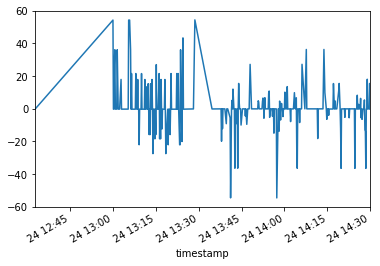

In [16]:
# Plot the resulting bid-ask spread data
ten_s_mean_df.plot()

In [21]:
# Calculate the autocorrelation
ten_s_mean_df.autocorr(lag=1)

0.13633199304665172

In [22]:
ten_s_mean_df.autocorr(lag=2)

0.012227002063789384

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

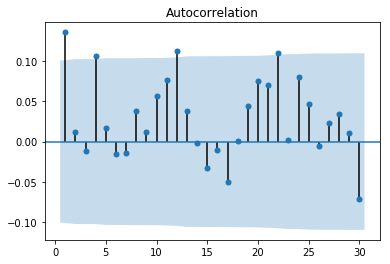

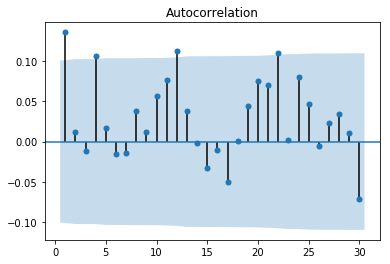

In [24]:
# Plot the ACF
plot_acf(ten_s_mean_df, lags=30, zero=False)

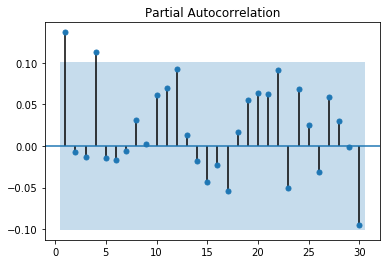

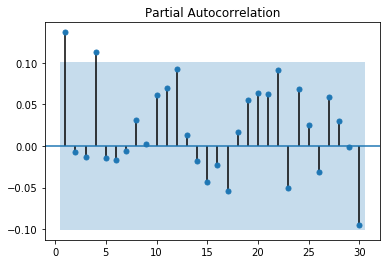

In [26]:
# Plot the PACF
plot_pacf(ten_s_mean_df, lags=30, zero=False)